In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3
...,...,...
9845,ffe5c306.jpg,w_2ceab05
9846,ffeaa7a4.jpg,w_b067417
9847,ffecec63.jpg,w_8b56cb1
9848,fff04277.jpg,w_2dcbf82


In [4]:
f = open('cropping.txt', 'rt').read()
line_list = f.split('\n')
bbox_dic = {}
for line in tqdm(line_list, total=len(line_list)):
    id_points = line.split(',')
    id, points = id_points[0], np.array(id_points[1:])
    img = cv2.imread('dataset/images/train/' + id)
    h, w = img.shape[0], img.shape[1]
    points = (points.reshape((-1, 2))).astype(int)
    if points.shape[0] != 0:
        x_min, x_max = np.min(points[:, 0]), np.max(points[:, 0])
        y_min, y_max = np.min(points[:, 1]), np.max(points[:, 1])
        bbox = [[(x_min + x_max) / 2 / w, (y_min + y_max) / 2 / h, (x_max - x_min) / w, (y_max - y_min) / h]]
    # train.loc[train['Image'] == id, 'bbox'] = bbox
        bbox_dic[id] = bbox
# train['bbox'] = train['Image'].map(bbox_dic)
bbox_dic = pd.Series(bbox_dic)
train['bbox'] = train['Image'].map(bbox_dic)
# train['Image'].map(bbox_dic)

100%|██████████| 1200/1200 [00:04<00:00, 289.68it/s]


In [5]:
train = train.loc[~train['bbox'].isna(), :]
train

,Image,Id,bbox
1,000466c4.jpg,w_1287fbc,"[[0.3861904761904762, 0.525, 0.328571428571428..."
2,00087b01.jpg,w_da2efe0,"[[0.4957142857142857, 0.5081521739130435, 0.98..."
4,0014cfdf.jpg,w_f22f3e3,"[[0.49357142857142855, 0.5314070351758794, 0.8..."
5,0025e8c2.jpg,w_8b1ca89,"[[0.496, 0.47699386503067487, 0.756, 0.3006134..."
7,0031c258.jpg,new_whale,"[[0.49476190476190474, 0.4934210526315789, 0.9..."
...,...,...,...
9806,feb9ded0.jpg,w_2a939eb,"[[0.49047619047619045, 0.46936542669584247, 0...."
9813,ff0d2705.jpg,w_4e52a49,"[[0.49142857142857144, 0.5216666666666666, 0.9..."
9819,ff2c20cc.jpg,w_f6fb689,"[[0.4719047619047619, 0.5681818181818182, 0.91..."
9832,ff8b2ad0.jpg,w_0f20cbc,"[[0.4942857142857143, 0.49828178694158076, 0.9..."


In [6]:
for img_name in tqdm(train['Image']):
    img = cv2.imread('dataset/images/train/' + img_name)
    train.loc[train['Image'] == img_name, 'hight'] = img.shape[0]
    train.loc[train['Image'] == img_name, 'width'] = img.shape[1]
train

  0%|          | 0/1200 [00:00<?, ?it/s]/tmp/ipykernel_5841/123064445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['Image'] == img_name, 'hight'] = img.shape[0]
/tmp/ipykernel_5841/123064445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['Image'] == img_name, 'width'] = img.shape[1]
100%|██████████| 1200/1200 [00:04<00:00, 260.84it/s]


,Image,Id,bbox,hight,width
1,000466c4.jpg,w_1287fbc,"[[0.3861904761904762, 0.525, 0.328571428571428...",700.0,1050.0
2,00087b01.jpg,w_da2efe0,"[[0.4957142857142857, 0.5081521739130435, 0.98...",368.0,1050.0
4,0014cfdf.jpg,w_f22f3e3,"[[0.49357142857142855, 0.5314070351758794, 0.8...",398.0,700.0
5,0025e8c2.jpg,w_8b1ca89,"[[0.496, 0.47699386503067487, 0.756, 0.3006134...",652.0,1000.0
7,0031c258.jpg,new_whale,"[[0.49476190476190474, 0.4934210526315789, 0.9...",456.0,1050.0
...,...,...,...,...,...
9806,feb9ded0.jpg,w_2a939eb,"[[0.49047619047619045, 0.46936542669584247, 0....",457.0,1050.0
9813,ff0d2705.jpg,w_4e52a49,"[[0.49142857142857144, 0.5216666666666666, 0.9...",600.0,1050.0
9819,ff2c20cc.jpg,w_f6fb689,"[[0.4719047619047619, 0.5681818181818182, 0.91...",506.0,1050.0
9832,ff8b2ad0.jpg,w_0f20cbc,"[[0.4942857142857143, 0.49828178694158076, 0.9...",291.0,1050.0


In [7]:
# for idx in tqdm(train.index, total = 1200):
#     label_path = 'dataset/labels/train/' + train.loc[idx, 'Image'][:-3] + 'txt'
#     # print(label_path)
#     # print(label_path)
#     # print(str(train.loc[idx, 'bbox'])[2: -2].replace(',', ''))
#     with open(label_path, 'w') as f:
#         f.write('0 ' + str(train.loc[idx, 'bbox'])[2: -2].replace(',', ''))

[0.49476190476190474, 0.4934210526315789, 0.9857142857142858, 0.9254385964912281]
(456, 1050, 3)
[1, 13] [1037, 436]


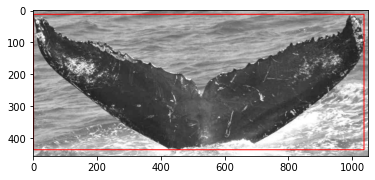

In [8]:
image_name = '0031c258'
image_path = 'dataset/images/train/' + image_name + '.jpg'
img = cv2.imread(image_path)
label_path = 'dataset/labels/train/' + image_name + '.txt'
with open(label_path, 'rt') as f:
    
    annot = f.read()
    annot = np.array(annot.split(' ')[1:])
    annot = [float(a) for a in annot]
    print(annot)
pt1 = [int((annot[0] - annot[2] / 2) * img.shape[1]), int((annot[1] - annot[3] / 2) * img.shape[0])]
pt2 = [int((annot[0] + annot[2] / 2) * img.shape[1]), int((annot[1] + annot[3] / 2) * img.shape[0])]
print(img.shape)
print(pt1, pt2)
image_path = 'dataset/images/train/' + image_name + '.jpg'
img = cv2.imread(image_path)
img = cv2.rectangle(img, pt1, pt2, [255, 0, 0], 2)
plt.imshow(img)

In [ ]:
! python3 'yolov5/train.py'  --data 'yolov5/whale_config/whale_data.yaml' --device '0' --weight 'yolov5/yolov5x.pt' --epochs 300 --batch-size 24 --hyp 'yolov5/whale_config/whale_hyp.yaml' 

train: weights=yolov5/yolov5x.pt, cfg=, data=yolov5/whale_config/whale_data.yaml, hyp=yolov5/whale_config/whale_hyp.yaml, epochs=300, batch_size=24, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.8.10 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl

72e74903.jpg
72e74903
[0.489648033126294, 0.3695652173913043, 0.9585921325051759, 0.5362318840579711]
(207, 483, 3)
[5, 20] [468, 132]
dataset/images/train/72e74903.jpg
4416


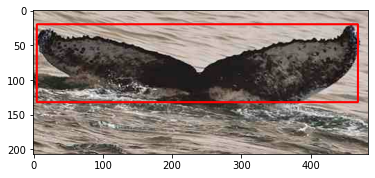

In [10]:
from random import choice
idx = choice(train['Image'].index)
# idx = 1
image_name = train['Image'][idx]
print(image_name)
image_name = image_name.split('.')[0]
print(image_name)
image_path = 'dataset/images/train/' + image_name + '.jpg'
img = cv2.imread(image_path)
label_path = 'dataset/labels/train/' + image_name + '.txt'
with open(label_path, 'rt') as f:
    annot = f.read()
    annot = np.array(annot.split(' ')[1:])
    annot = [float(a) for a in annot]
    print(annot)
pt1 = [int((annot[0] - annot[2] / 2) * img.shape[1]), int((annot[1] - annot[3] / 2) * img.shape[0])]
pt2 = [int((annot[0] + annot[2] / 2) * img.shape[1]), int((annot[1] + annot[3] / 2) * img.shape[0])]
print(img.shape)
print(pt1, pt2)
image_path = 'dataset/images/train/' + image_name + '.jpg'
print(image_path)
img = cv2.imread(image_path)
img = cv2.rectangle(img, pt1, pt2, [255, 0, 0], 2)
plt.imshow(img)
print(idx)